In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from Part1A import calculate_distances, calculate_r2

# Using Mahalanobis as measure of distance

In [2]:
train_data = np.genfromtxt('Regression/trainingData.csv', delimiter = ",")
test_data = np.genfromtxt('Regression/testData.csv', delimiter = ",")
KNNRM = KNeighborsRegressor(n_neighbors=3, algorithm = 'brute', 
                            metric='mahalanobis', metric_params={'V':np.cov(train_data[:,0:-1])})

In [3]:
KNNRM.fit(train_data[:,0:-1], train_data[:,-1])

KNeighborsRegressor(algorithm='brute', metric='mahalanobis',
                    metric_params={'V': array([[ 1.10627836,  0.12535803, -0.02765481, ..., -0.41880522,
        -0.59713489,  0.20156931],
       [ 0.12535803,  1.00190315, -0.1984574 , ...,  0.30053543,
        -0.15101237,  0.22505434],
       [-0.02765481, -0.1984574 ,  0.95482353, ..., -0.22128758,
        -0.01273118,  0.23208212],
       ...,
       [-0.41880522,  0.30053543, -0.22128758, ...,  0.82752817,
         0.36539651, -0.37336213],
       [-0.59713489, -0.15101237, -0.01273118, ...,  0.36539651,
         0.81258381,  0.0698001 ],
       [ 0.20156931,  0.22505434,  0.23208212, ..., -0.37336213,
         0.0698001 ,  1.01664977]])},
                    n_neighbors=3)

In [4]:
KNNRM.score(test_data[:,0:-1], test_data[:,-1])

c:\python3.7.8\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)


0.8205332483357298

# Using Min-Max scaler (Normalization) and inverse of squared distance as weights
## Implementing it using numpy

In [5]:
train_data = np.genfromtxt('Regression/trainingData.csv', delimiter = ",")
test_data = np.genfromtxt('Regression/testData.csv', delimiter = ",")

In [6]:
def predict(training_features, query_features):
    
    # call calculate_distances
    distances = calculate_distances(training_features, query_features)
    
    # Set the number of neighbours to consider
    k = 3 # We can paramterize this so that while calling predict value of K can be passed as an argument to this function. Instead of 2 parameters this function will then take 3 parameters
    
    # use np.argsort to return indices from distances
    indices = np.argsort(distances)
    
    # average the 3 nearest disances
    #predicted_value = np.mean(train_data[indices[0:k],-1])
    
    # Inverse weighted distance average
    #predicted_value = np.sum(train_data[indices[0:k],-1] * (1/(distances[indices[0:k]]))) / np.sum((1/(distances[indices[0:k]])))
    
    # squared inverse weighted distance average
    predicted_value = np.sum(train_data[indices[0:k],-1] * np.square(1/(distances[indices[0:k]]))) / np.sum(np.square(1/(distances[indices[0:k]])))
    
    # return the prediction
    return predicted_value

In [7]:
min_train_data = train_data[:,0:-1].min(axis = 0)
max_train_data = train_data[:,0:-1].max(axis = 0)

train_data[:,0:-1] = ( train_data[:,0:-1] - train_data[:,0:-1].min(axis = 0) ) / ( train_data[:,0:-1].max(axis = 0) - train_data[:,0:-1].min(axis = 0) )

test_data[:,0:-1] = ( test_data[:, 0:-1] - min_train_data ) / ( max_train_data - min_train_data )

predictions = []

for i in range(len(test_data)):
    predicted_value = predict(train_data[:,0:-1], test_data[i,0:-1])
    predictions.append(predicted_value)
r2_score = calculate_r2(test_data[:,-1], np.array(predictions))
print("R2 Score is: ", r2_score)

R2 Score is:  0.8286449277052543


# From above two methods, it is evident that the altering the scale of the features is not improve the R squared error by much.

# Let's check the correlation among the features to see if there are any weak predictors

## Let us convert the numpy array into pandas dataframe to get better visualization

In [8]:
train_data = np.genfromtxt('Regression/trainingData.csv', delimiter = ",")
test_data = np.genfromtxt('Regression/testData.csv', delimiter = ",")

In [9]:
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

In [10]:
#Let us check the correlation
df_train.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.004362,0.007072,0.000705,0.008373,-0.011065,0.022645,-0.000628,0.014265,0.003355,-0.004684,-0.017824,0.004609
1,-0.004362,1.000000,-0.020603,-0.001333,-0.005931,0.008843,0.008947,-0.004167,-0.021844,0.004767,0.004464,-0.005987,-0.001219
2,0.007072,-0.020603,1.000000,0.000111,-0.014672,0.014021,-0.010896,-0.008521,0.000466,-0.013469,0.002297,-0.013291,-0.022593
3,0.000705,-0.001333,0.000111,1.000000,-0.000592,0.020930,0.003464,0.018884,-0.009665,-0.013561,0.014955,0.000111,0.006303
4,0.008373,-0.005931,-0.014672,-0.000592,1.000000,0.018053,0.000553,0.006604,-0.018079,0.001130,-0.007775,-0.002404,0.000415
5,-0.011065,0.008843,0.014021,0.020930,0.018053,1.000000,0.010928,0.009479,0.009403,-0.014863,0.013834,0.009100,0.009425
6,0.022645,0.008947,-0.010896,0.003464,0.000553,0.010928,1.000000,0.000829,0.004241,-0.012111,-0.014598,0.001990,0.500095
7,-0.000628,-0.004167,-0.008521,0.018884,0.006604,0.009479,0.000829,1.000000,-0.015647,-0.008439,0.006654,-0.010313,0.484448
8,0.014265,-0.021844,0.000466,-0.009665,-0.018079,0.009403,0.004241,-0.015647,1.000000,0.016315,-0.005209,-0.027966,0.152783
9,0.003355,0.004767,-0.013469,-0.013561,0.001130,-0.014863,-0.012111,-0.008439,0.016315,1.000000,0.013414,0.000968,0.466152


## Above correlation table represents the correlation among the features.

### We can see that the target variable (represented by the row number and column number 12) is having very weak correlation with the feature variables (numbered 0,1,3,4,5, and 10) which are not contributing much to the value of our target variable. Let us remove those features from our data set and check if our R2 Score improves

In [11]:
# new_train_data = train_data[:,[2,6,7,8,9,11,12]]
# new_test_data = test_data[:,[2,6,7,8,9,11,12]]

new_train_data = train_data[:,[6,7,8,9,11,12]]
new_test_data = test_data[:,[6,7,8,9,11,12]]

In [12]:
def predict(training_features, query_features):
    
    # call calculate_distances
    distances = calculate_distances(training_features, query_features)
    
    # Set the number of neighbours to consider
    k = 3 # We can paramterize this so that while calling predict value of K can be passed as an argument to this function. Instead of 2 parameters this function will then take 3 parameters
    
    # use np.argsort to return indices from distances
    indices = np.argsort(distances)
    
    # average the 3 nearest disances
    #predicted_value = np.mean(train_data[indices[0:k],-1])
    
    # Inverse weighted distance average
    #predicted_value = np.sum(train_data[indices[0:k],-1] * (1/(distances[indices[0:k]]))) / np.sum((1/(distances[indices[0:k]])))
    
    # squared inverse weighted distance average
    predicted_value = np.sum(new_train_data[indices[0:k],-1] * np.square(1/(distances[indices[0:k]]))) / np.sum(np.square(1/(distances[indices[0:k]])))
    
    # return the prediction
    return predicted_value

In [13]:
predictions = []

for i in range(len(new_test_data)):
    predicted_value = predict(new_train_data[:,0:-1], new_test_data[i,0:-1])
    predictions.append(predicted_value)
r2_score = calculate_r2(new_test_data[:,-1], np.array(predictions))
print("R2 Score is: ", r2_score)

R2 Score is:  0.9611635779734792


# Removing the weak predictors which were pulling down the performance of KMeans algorith, has improved the score significantly.. Let us now check the R2 Score for different values of K (no of neighbours)

In [14]:
def predict(training_features, query_features, k):
    
    # call calculate_distances
    distances = calculate_distances(training_features, query_features)
    
    # Set the number of neighbours to consider
    #k = 2 # We can paramterize this so that while calling predict value of K can be passed as an argument to this function. Instead of 2 parameters this function will then take 3 parameters
    
    # use np.argsort to return indices from distances
    indices = np.argsort(distances)
    
    # average the 3 nearest disances
    #predicted_value = np.mean(train_data[indices[0:k],-1])
    
    # Inverse weighted distance average
    #predicted_value = np.sum(train_data[indices[0:k],-1] * (1/(distances[indices[0:k]]))) / np.sum((1/(distances[indices[0:k]])))
    
    # squared inverse weighted distance average
    predicted_value = np.sum(new_train_data[indices[0:k],-1] * np.square(1/(distances[indices[0:k]]))) / np.sum(np.square(1/(distances[indices[0:k]])))
    
    # return the prediction
    return predicted_value

In [15]:
K = [1,2,3,4,5,6,7,8,9,10]
r2_scores = []
for k in K:
    predictions = []
    for i in range(len(new_test_data)):
        predicted_value = predict(new_train_data[:,0:-1], new_test_data[i,0:-1], k)
        predictions.append(predicted_value)
    r2_score = calculate_r2(new_test_data[:,-1], np.array(predictions))
    r2_scores.append(r2_score)
    print("K = {}, R2_Score = {}".format(k, r2_score))

K = 1, R2_Score = 0.9286765460737724
K = 2, R2_Score = 0.9534594790307207
K = 3, R2_Score = 0.9611635779734792
K = 4, R2_Score = 0.9660481252882993
K = 5, R2_Score = 0.9682009605433861
K = 6, R2_Score = 0.9682937694255859
K = 7, R2_Score = 0.9692738087759513
K = 8, R2_Score = 0.9692388281783086
K = 9, R2_Score = 0.9694553039757106
K = 10, R2_Score = 0.9695399682791874


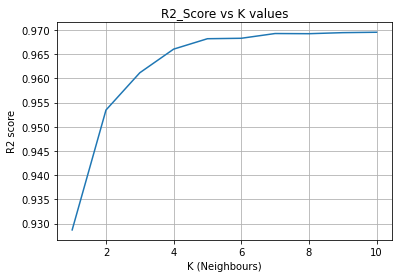

In [16]:
plt.plot(K, r2_scores)
plt.title("R2_Score vs K values")
plt.xlabel("K (Neighbours)")
plt.ylabel("R2 score")
plt.grid(True)

# From above plot, we can see that the R2_score has increased by 1% from K = 2 to K = 4, there after we do not see much improvement in our R2_score. We can choose K = 4 (Neighbours) for this problem as the best number of nearest neighbours

# Using Mahalanobis on selected Strong predictors

In [17]:
train_data = np.genfromtxt('Regression/trainingData.csv', delimiter = ",")
test_data = np.genfromtxt('Regression/testData.csv', delimiter = ",")
KNNRM = KNeighborsRegressor(n_neighbors=3, algorithm = 'brute', 
                            metric='mahalanobis', metric_params={'V':np.cov(new_train_data[:,0:-1])})

In [18]:
KNNRM.fit(new_train_data[:,0:-1], new_train_data[:,-1])

KNeighborsRegressor(algorithm='brute', metric='mahalanobis',
                    metric_params={'V': array([[ 0.0053048 , -0.03783644, -0.05894303, ..., -0.05608456,
        -0.00221903,  0.00551058],
       [-0.03783644,  0.56439696,  0.44349119, ...,  0.24860501,
        -0.33877491,  0.0638371 ],
       [-0.05894303,  0.44349119,  0.79474251, ...,  0.39779431,
        -0.27049391,  0.09141051],
       ...,
       [-0.05608456,  0.24860501,  0.39779431, ...,  1.01016537,
         0.59786998, -0.38187748],
       [-0.00221903, -0.33877491, -0.27049391, ...,  0.59786998,
         0.99719971, -0.29464167],
       [ 0.00551058,  0.0638371 ,  0.09141051, ..., -0.38187748,
        -0.29464167,  0.43708408]])},
                    n_neighbors=3)

In [19]:
KNNRM.score(new_test_data[:,0:-1], new_test_data[:,-1])

c:\python3.7.8\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)


0.9606728074654239

# Normalization on selected strong predictors and checking its effect on KNN Regressor

In [20]:
min_train_data = new_train_data[:,0:-1].min(axis = 0)
max_train_data = new_train_data[:,0:-1].max(axis = 0)

new_train_data[:,0:-1] = ( new_train_data[:,0:-1] - new_train_data[:,0:-1].min(axis = 0) ) / ( new_train_data[:,0:-1].max(axis = 0) - new_train_data[:,0:-1].min(axis = 0) )

new_test_data[:,0:-1] = ( new_test_data[:, 0:-1] - min_train_data ) / ( max_train_data - min_train_data )

In [21]:
for k in K:
    predictions = []
    for i in range(len(new_test_data)):
        predicted_value = predict(new_train_data[:,0:-1], new_test_data[i,0:-1], k)
        predictions.append(predicted_value)
    r2_score = calculate_r2(new_test_data[:,-1], np.array(predictions))
    r2_scores.append(r2_score)
    print("K = {}, R2_Score = {}".format(k, r2_score))

K = 1, R2_Score = 0.9272798660104137
K = 2, R2_Score = 0.9533421526653921
K = 3, R2_Score = 0.9605015448768033
K = 4, R2_Score = 0.9651223592663756
K = 5, R2_Score = 0.9665981111969462
K = 6, R2_Score = 0.96776183686209
K = 7, R2_Score = 0.9675790432065086
K = 8, R2_Score = 0.9678005536359034
K = 9, R2_Score = 0.9678328090476075
K = 10, R2_Score = 0.967446664594377


# From above results it is safe to conclude that in the given data set, euclidean distance with inverse squared distance weights is performing much better, and that there was issue with existance of some unwanted / weak predictors which affected our model performance earlier